In [1]:
%matplotlib inline

In [15]:
# -*- coding: utf-8 -*-
"""
@author: Hiromasa Kaneko

課題4: scikit-learnを使って主成分分析を行うプログラムを作成せよ。寄与率と累積寄与率を図示できるようにしておくこと。

課題5: 乱数を使って変数間の相関係数の高い２変数のデータを適当に作成し、主成分分析を行い、ローディングの確認をせよ。
データの前処理としてオートスケーリングを行うこと。主成分分析の前後でデータをプロットして考察せよ。

課題6: iris.csvを読み込みオートスケーリングをしてから主成分分析を行いデータの可視化をせよ。可視化の様子からいえることを
考察せよ。
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA

data_flag = 1  # 1:iris.csv, 2:random
do_autoscaling = True  # True or False

if data_flag == 1:
    # load data set
    raw_data = pd.read_csv('iris.csv', encoding='SHIFT-JIS', index_col=0)

elif data_flag == 2:
    # make data set
    sample_number = 30
    gamma = 1
    x_base = np.arange(-1, 1, 0.01, dtype=float)
    gram_matrix = np.exp(-gamma * ((x_base[:, np.newaxis] - x_base) ** 2))
    gram_matrix = gram_matrix + np.identity(gram_matrix.shape[0]) * 1e-14
    L = np.linalg.cholesky(gram_matrix)
    np.random.seed(10000)
    data = L.dot(np.random.randn(x_base.shape[0], sample_number)).transpose()
    np.random.seed()
    raw_data = pd.DataFrame(np.c_[data[:, 0], data[:, 30]])
    raw_data.columns = ['x1', 'x2']
    raw_data.index = [str(i) for i in range(0, sample_number)]
    plt.scatter(raw_data.x1, raw_data.x2)
    for number_of_samples in np.arange(0, raw_data.shape[0] - 1):
        plt.text(raw_data.x1[number_of_samples], raw_data.x2[number_of_samples], raw_data.index[number_of_samples],
                 horizontalalignment='left', verticalalignment='top')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()



In [16]:
# autoscaling
if do_autoscaling:
    autoscaled_data = (raw_data - raw_data.mean(axis=0)) / raw_data.std(axis=0, ddof=1)
else:
    autoscaled_data = raw_data



In [17]:
# PCA
# pca_results = PCA(n_components =3)
pca_results = PCA()
scoreT = pca_results.fit_transform(autoscaled_data)
loading_vector = pca_results.components_.transpose()



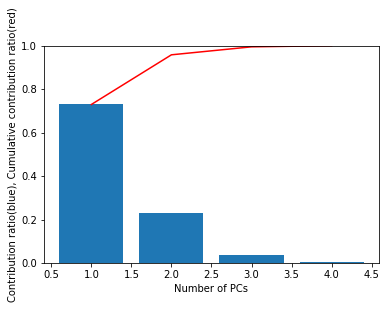

In [18]:
# Check contribution ratio and cumulative contribution ratio of each PC
contribution_ratio = pca_results.explained_variance_ratio_
cumulative_contribution_ratio = np.cumsum(contribution_ratio)
plt.bar(np.arange(1, len(contribution_ratio) + 1), contribution_ratio, align='center')
plt.plot(np.arange(1, len(cumulative_contribution_ratio) + 1), cumulative_contribution_ratio, 'r-')
plt.ylim(0, 1)
plt.xlabel('Number of PCs')
plt.ylabel('Contribution ratio(blue), Cumulative contribution ratio(red)')
plt.show()



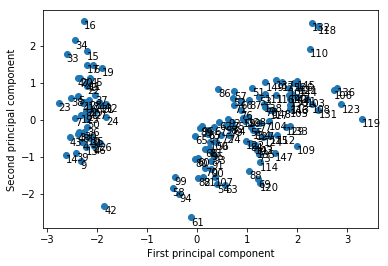

In [19]:
# Check plot of PC1 vs. PC2
plt.scatter(scoreT[:, 0], scoreT[:, 1])
for number_of_samples in np.arange(0, raw_data.shape[0] - 1):
    plt.text(scoreT[number_of_samples, 0], scoreT[number_of_samples, 1], raw_data.index[number_of_samples],
             horizontalalignment='left', verticalalignment='top')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()



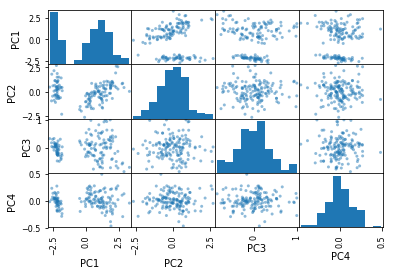

In [20]:
# Scatter plots of PC1, PC2, PC3 and PC4
if scoreT.shape[1] > 3:
    ScoreTpd = pd.DataFrame(scoreT[:, :4])
    ScoreTpd.columns = ['PC1', 'PC2', 'PC3', 'PC4']
    scatter_matrix(ScoreTpd)
    plt.show()
